In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mapgroup = {'A': 'stops',
            'B': 'wait'}

    
all_sats = pd.read_csv('alignments.csv')
all_sats = all_sats.dropna(subset=['Satisfaction'])
all_sats=all_sats.fillna('None')
all_sats.group = all_sats.group.apply(lambda x: mapgroup[x])
all_sats.loc[all_sats.VoteScenario=='majority_extreme','VoteScenario'] = 'committed minority'


see https://stackoverflow.com/questions/67188162/is-there-a-way-to-add-hatch-marks-on-a-seaborn-displot-using-a-kernal-density-es
https://gist.github.com/Thiagobc23/44a0a25a4c76f693ea665767b68c7027

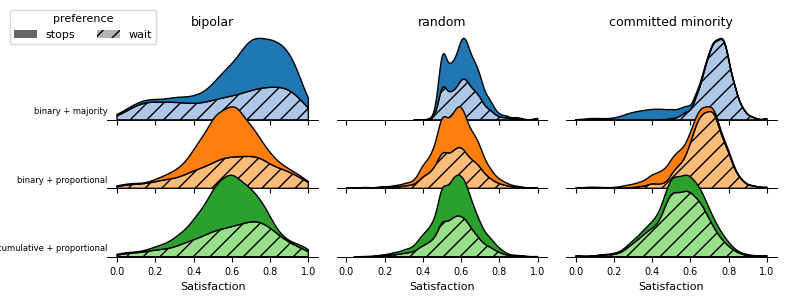

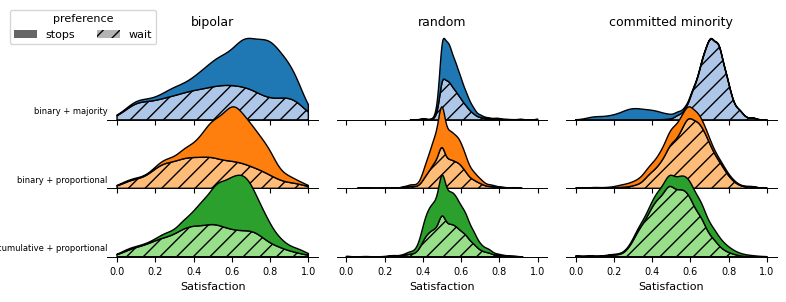

In [2]:
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})

plt.rc('axes', facecolor=(0, 0, 0, 0), linewidth=0.7)
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7)
plt.rc('font', size=8)
plt.rc('axes', titlesize=9, labelsize=8)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8, labelsize=8)


hatches = ['', '//']

row_order = ["binary + majority", 
             "binary + proportional",
             "cumulative + proportional"]


# row = "binary + majority"
voting_scenarios = all_sats.VoteScenario.unique()

colors = [plt.cm.tab20.colors[i:i + 2] for i in range(0, len(voting_scenarios) * 2, 2)]
groups = ['stops','wait']

for key, grp in all_sats.groupby('Scenario'):
    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(7, 3), sharex=True, layout='tight'
                            )

    # height=1; aspect=6
    height=3; aspect=1
    # g = sns.FacetGrid(grp, palette='pastel', row='VoteCombination', col='VoteScenario', hue='group', 
    #                  height=3, aspect=1,
    #                  # height=1, aspect=6,
    #                  )

    
    # g = sns.displot(data=grp, x='Satisfaction', row='VoteCombination', col='VoteScenario', kind='kde', 
    #             hue='group', palette='pastel', common_norm=False,
    #             multiple='stack', height=height, aspect=aspect, fill=True)

    # handles = []
    for j, row in enumerate(row_order):
        for i, vs in enumerate(voting_scenarios):
            # data = grp.query("(VoteScenario==@vs) and (VoteCombination==@row)")
            ax = axes[j, i]
            data = grp.loc[(grp.VoteScenario==vs) & (grp.VoteCombination==row)]
            sns.kdeplot(data=data,
                        x='Satisfaction', hue='group', hue_order=groups, alpha=1,
                            multiple='stack',  fill=True,
                        palette=colors[j], legend=False, clip=(0,1),
                            ax=ax)
            ax.set_yticks([])
            ax.set_ylabel(None)
            
            # for h, hatch in zip(ax.legend_.legend_handles, hatches):
            #     # h.set_label(f'{region}, {age}')
            #     h.set_hatch(hatch)
            #     # handles.append(h)
            # ax.legend_.remove() # remove the automatic legends
            if i==0:
                txt = ax.text(0, .1, row, color='black', fontsize=6,
                            ha="right", va="center", transform=ax.transAxes)
                txt.set_in_layout(False)
                
            if j==0:
                ax.set_title(vs)
            for collection, hatch in zip(ax.collections[::-1], hatches * len(voting_scenarios)):
                collection.set_hatch(hatch)
    # g.map_dataframe(sns.kdeplot, x="Satisfaction", alpha=1, multiple='stack')
    # g.map_dataframe(sns.kdeplot, x="Satisfaction", color='black', fill=False, 
    #                common_norm=False)


    # remove subplot titles
    # g.set_titles("")


    # construct proxy artist patches
    leg_artists = []
    for k, hatch in enumerate(hatches):
        p = mpl.patches.Patch(facecolor=f'{0.4+0.3*k}', hatch=hatch)
        # can also explicitly declare 2nd color like this
        #p = matplotlib.patches.Patch(facecolor='#DCDCDC', hatch=hatch_dict[i], edgecolor='0.5')

        leg_artists.append(p)

    # remove left spine
    sns.despine(left=True)
    
    
    # and add them to legend.
    leg = fig.legend(leg_artists, groups, loc='upper right', bbox_to_anchor=(0.1,1), ncols=2, 
               title='preference', facecolor='white')
    # leg.set_in_layout(False)
    
    fig.tight_layout()

    # adjust subplots to create overlap
    fig.subplots_adjust(hspace=-.2)
    
    fig.savefig(f'../figs/alignment_distribution/{key}_ridge.pdf', bbox_inches='tight')
    # print(grp.head())
    # break